In [2]:
# Step 1: Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import nltk
import string
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
# Step 1.1: Load the dataset
data_frame = pd.read_csv('sentimentdataset.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [5]:
# Step 2: Remove unnecessary columns
data_frame.drop(['Unnamed: 0.1','Unnamed: 0','Timestamp','User','Platform','Hashtags','Retweets','Likes','Country','Year','Month','Day','Hour'],axis=1,inplace=True)

# Verify the shape of the cleaned dataset
print(data_frame.shape)
# Output should show: (732, 2)

(732, 2)


In [6]:
data_frame.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [7]:
data_frame['Sentiment'].value_counts()

Sentiment
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64

In [9]:
dict(data_frame['Sentiment'].value_counts())

{' Positive  ': 44,
 ' Joy ': 42,
 ' Excitement ': 32,
 ' Neutral ': 14,
 ' Contentment ': 14,
 ' Happy ': 14,
 ' Hopeful ': 9,
 ' Sad ': 9,
 ' Gratitude ': 9,
 ' Curiosity ': 8,
 ' Embarrassed ': 8,
 ' Loneliness ': 7,
 ' Elation       ': 6,
 ' Bad ': 6,
 ' Despair ': 6,
 ' Hate ': 6,
 ' Playful ': 6,
 ' Gratitude     ': 5,
 ' Curiosity       ': 5,
 ' Enthusiasm    ': 5,
 ' Inspired ': 5,
 ' Empowerment   ': 5,
 ' Contentment   ': 5,
 ' Serenity        ': 5,
 ' Determination   ': 5,
 ' Acceptance      ': 5,
 ' Ambivalence     ': 5,
 ' Nostalgia       ': 5,
 ' Melancholy      ': 5,
 ' Numbness        ': 5,
 ' Confusion       ': 5,
 ' Serenity      ': 5,
 ' Indifference    ': 5,
 ' Frustrated ': 5,
 ' Bitterness ': 5,
 ' Euphoria      ': 4,
 ' Grief ': 4,
 ' Betrayal ': 4,
 ' Frustration ': 4,
 ' Nostalgia ': 4,
 ' Awe ': 4,
 ' Inspiration ': 4,
 ' Negative  ': 4,
 ' Proud ': 4,
 ' Grateful ': 4,
 ' Compassionate ': 4,
 ' Desolation ': 4,
 ' Hope          ': 4,
 ' Neutral   ': 4,
 ' Exc

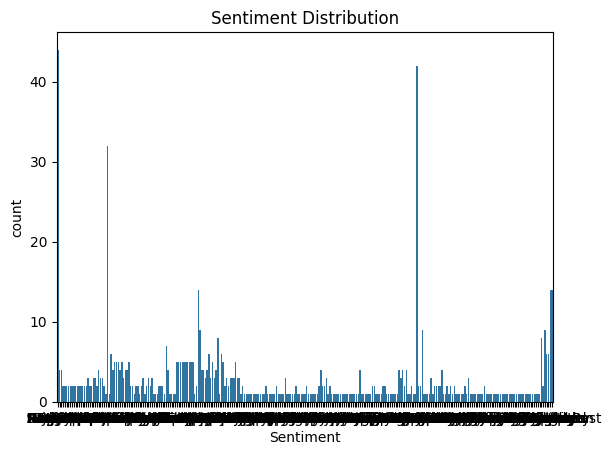

In [10]:
# Step 3: Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
sns.countplot(x='Sentiment', data=data_frame)
plt.title('Sentiment Distribution')
plt.show()

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\legit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\legit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\legit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Step 4.1: Emoji transformation
def transform_emojis(text):
    return emoji.demojize(text)

def preprocess_text(text):
    if not isinstance(text, str):
        return text

    # Transform emojis
    text = transform_emojis(text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Tokenize
    tokens = word_tokenize(text)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]

    return tokens

data_frame['PrText']=data_frame['Text'].apply(preprocess_text)

#After transformation here's how it looks
data_frame.head()

,Text,Sentiment,PrText
0,Enjoying a beautiful day at the park! ...,Positive,"[enjoying, beautiful, day, park]"
1,Traffic was terrible this morning. ...,Negative,"[traffic, terrible, morning]"
2,Just finished an amazing workout! 💪 ...,Positive,"[finished, amazing, workout, flexedbiceps]"
3,Excited about the upcoming weekend getaway! ...,Positive,"[excited, upcoming, weekend, getaway]"
4,Trying out a new recipe for dinner tonight. ...,Neutral,"[trying, new, recipe, dinner, tonight]"


In [16]:
# Step 5.1: Function to vectorize preprocessed text using Word2Vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

def vectorize(tokens,model):
  valid_tokens = [token for token in tokens if token in model.wv.index_to_key]
  if not valid_tokens:
        return np.zeros(model.vector_size)
  return np.mean([model.wv[token] for token in valid_tokens], axis=0)
model=Word2Vec(data_frame['PrText'].tolist(),vector_size=100, window=5, min_count=1)
data_frame['Embeddings']=data_frame['PrText'].apply(lambda x: vectorize(x, model))
data_frame['Embeddings'].head()

model=Word2Vec(data_frame['PrText'].tolist(),vector_size=100, window=5, min_count=1)
data_frame['Embeddings']=data_frame['PrText'].apply(lambda x: vectorize(x, model))
data_frame['Embeddings'].head()

#Let's look at the number of unique sentiments
data_frame['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [17]:
model=Word2Vec(data_frame['PrText'].tolist(),vector_size=100, window=5, min_count=1)
data_frame['Embeddings']=data_frame['PrText'].apply(lambda x: vectorize(x, model))
data_frame['Embeddings'].head()

0    [-0.0026879148, 0.0012386004, -0.0020856434, 0...
1    [0.002310421, -0.0026913497, 0.0024138791, 0.0...
2    [-0.0030862773, -0.00022521582, -2.8910403e-05...
3    [0.003672516, 0.0070619164, -0.002378391, -0.0...
4    [-0.001204375, 0.001831765, -0.00014213212, 0....
Name: Embeddings, dtype: object

In [17]:
# Step 6: Sentiment Analysis using Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(sentiment):
    score = analyzer.polarity_scores(sentiment)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
sentiments=data_frame['Sentiment'].tolist()
sentiments=[get_vader_sentiment(sentiment) for sentiment in sentiments]
data_frame['Category']=pd.Series(sentiments)
data_frame['Category'].value_counts()

Category
Positive    378
Negative    183
Neutral     171
Name: count, dtype: int64

In [19]:
# Step 7: Replace categories with numerical values
def label(category):
  if category == 'Positive':
    return 1
  elif category == 'Neutral':
    return 0
  else:
    return 1
data_frame['Category']=data_frame['Category'].apply(lambda x: label(x))

In [20]:
# Step 8: Split the data into training and testing sets
X=np.vstack(data_frame['Embeddings'])
y=data_frame['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (585, 100), Test set size: (147, 100)


In [27]:
# Step 9: Train a Logistic Regression model
classifier = LogisticRegression(solver='newton-cg')
classifier.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [28]:
# # Step 9.1: Make predictions
y_pred = classifier.predict(X_test)
# Step 9.2: Print the classification report and accuracy
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.73      1.00      0.84       107

    accuracy                           0.73       147
   macro avg       0.36      0.50      0.42       147
weighted avg       0.53      0.73      0.61       147

Accuracy: 0.7278911564625851


C:\Users\legit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\legit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\legit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [29]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_rf_pred = rf_classifier.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.73      1.00      0.84       107

    accuracy                           0.73       147
   macro avg       0.36      0.50      0.42       147
weighted avg       0.53      0.73      0.61       147

Random Forest Accuracy: 0.7278911564625851


C:\Users\legit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\legit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\legit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo